In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import matplotlib.colors as mcolors

In [11]:
def load_data(filename):
    #arr = np.loadtxt("Data/Data_comp/Data/wf_evolution_quad_mod_MPS_1D_R_"+str(R)+"_Nsteps_6000_maxdim_10_x_"+str(x)+"_O1_"+str(O1)+"_O2_"+str(O2)+".txt", dtype='str', delimiter=',')
    arr = np.loadtxt(filename, dtype='str', delimiter=',')
    arr = np.char.replace(arr, "im", "j")
    arr = np.char.replace(arr, " - ", "-")  
    arr = np.char.replace(arr, " + ", "+") 
    return arr.astype(complex)

def plot_heatmap_2D(path, title, ind, norm="log", logmin=1e-7, logmax=1):

    filename = path+"/Data_reconstructed/wf_2D_"+str(ind)+".txt"
    print(filename)
    if os.path.exists(filename):    
        arr = load_data(filename)
        arr[np.abs(arr)**2 < 1e-7] = 1e-7
        fig_width = 6  # Adjust this to control overall size
        fig_height = fig_width * 1.0 # Keep aspect square
        plt.figure(figsize=(fig_width, fig_height))
        x_width = 100
        y_width = 100
        crop = 1.0
        extent = [-x_width, x_width, -y_width, y_width]
        plt.xlim(-crop*x_width, crop*x_width)
        plt.title(title)

        if norm == "log":
            #img = plt.imshow(np.abs(np.flipud(arr))**2, 
            #       norm=mcolors.LogNorm(vmin=logmin, vmax=logmax),  # Avoid zero values
            #       cmap='viridis', aspect='auto', extent=extent)
            #img = plt.imshow(np.abs(np.flipud(arr))**2, 
            #       norm=mcolors.LogNorm(vmin=1e-7, vmax=np.max(np.abs(np.flipud(arr))**2)),  # Avoid zero values
            #       cmap='viridis', aspect='auto', extent=extent)
            #img = plt.imshow(np.abs(np.flipud(arr))**2, 
            #       norm=mcolors.LogNorm(vmin=1e-7, vmax=logmax),  # Avoid zero values
            #       cmap='viridis', aspect='auto', extent=extent)
            img = plt.imshow(np.abs(np.flipud(arr))**2/np.max(np.abs(np.flipud(arr))**2), 
                   norm=mcolors.LogNorm(vmin=logmin, vmax=logmax),  # Avoid zero values
                   cmap='viridis', aspect='auto', extent=extent)
        elif norm == "power":
            gamma = 3  # Adjust gamma: <1 enhances large values, >1 enhances small values
            norm = mcolors.PowerNorm(gamma=gamma, vmin=logmin, vmax=logmax)
            img = plt.imshow(np.abs(np.flipud(arr))**2/np.max(np.abs(np.flipud(arr))**2), 
                   norm=norm,  # Avoid zero values
                   cmap='viridis', aspect='auto', extent=extent)
        elif norm == "normal": # normal scale
            #img = plt.imshow(np.abs(np.flipud(arr))**2,
            #       cmap='viridis', aspect='auto', extent=extent)
            img = plt.imshow(np.abs(np.flipud(arr))**2/np.max(np.abs(np.flipud(arr))**2),  
                   cmap='viridis', aspect='auto', extent=extent)
        else:
            print("wrong keyword for scale!")
            kfkjsl
        
        cbar = plt.colorbar(img)
        cbar.set_label("|psi|^2")
        #new_yticks = np.linspace(0, 500, num=11)  # Choose 11 ticks for clarity
        #new_yticklabels = np.linspace(0, 50, num=11)  # Map to [0, 100]
        #plt.yticks(new_yticks, [f"{int(y)}" for y in new_yticklabels])
        plt.xlabel("x position")
        plt.ylabel("y position")
        plt.savefig(path+"/Plots/"+title+".png", dpi=300)
    else:
        print("File not found!")


def plot_heatmap_reduced_2D(path, title, ind, x0, y0, xred, yred, norm="log", logmin=1e-7, logmax=1):

    filename = path+"/Data_reconstructed/wf_red_2D_"+str(x0)+"_"+str(y0)+"_"+str(xred)+"_"+str(ind)+".txt"
    print(filename)
    if os.path.exists(filename):    
        arr = load_data(filename)
        arr[np.abs(arr)**2 < 1e-7] = 1e-7
        fig_width = 6  # Adjust this to control overall size
        fig_height = fig_width * 1.0  # Keep aspect square
        plt.figure(figsize=(fig_width, fig_height))
        extent = [x0-float(xred), x0+float(xred), y0-float(yred), y0+float(yred)]
        plt.xlim(x0-float(xred), x0+float(xred))
        plt.title(title)
        
        p_density_rescaled = np.abs(np.flipud(arr))**2/np.max(np.abs(np.flipud(arr))**2)
        p_max = np.max(p_density_rescaled)
        p_min = np.min(p_density_rescaled)
        print("p_max ", p_max)
        print("p_min ", p_min)
        
        if norm == "log":
            #img = plt.imshow(np.abs(np.flipud(arr))**2, 
            #       norm=mcolors.LogNorm(vmin=logmin, vmax=logmax),  # Avoid zero values
            #       cmap='viridis', aspect='auto', extent=extent)
            #img = plt.imshow(np.abs(np.flipud(arr))**2, 
            #       norm=mcolors.LogNorm(vmin=1e-7, vmax=np.max(np.abs(np.flipud(arr))**2)),  # Avoid zero values
            #       cmap='viridis', aspect='auto', extent=extent)
            #img = plt.imshow(np.abs(np.flipud(arr))**2, 
            #       norm=mcolors.LogNorm(vmin=1e-7, vmax=logmax),  # Avoid zero values
            #       cmap='viridis', aspect='auto', extent=extent)
            
            img = plt.imshow(p_density_rescaled, 
                   norm=mcolors.LogNorm(vmin=logmin, vmax=p_max),  # Avoid zero values
                   cmap='viridis', aspect='auto', extent=extent)
            
            #img = plt.imshow(np.abs(arr_red)**2/arr_max, 
            #       norm=mcolors.LogNorm(vmin=arr_min/arr_max, vmax=1),  # Avoid zero values
            #       cmap='viridis', aspect='auto', extent=extent)

            #img = plt.imshow(arr_red, 
            #       norm=mcolors.LogNorm(vmin=arr_min, vmax=arr_max),  # Avoid zero values
            #       cmap='viridis', aspect='auto')
        elif norm == "power":
            gamma = 3  # Adjust gamma: <1 enhances large values, >1 enhances small values
            norm = mcolors.PowerNorm(gamma=gamma, vmin=logmin, vmax=logmax)
            img = plt.imshow(np.abs(np.flipud(arr))**2/np.max(np.abs(np.flipud(arr))**2), 
                   norm=norm,  # Avoid zero values
                   cmap='viridis', aspect='auto', extent=extent)
        elif norm == "normal": # normal scale
            #img = plt.imshow(np.abs(np.flipud(arr))**2,
            #       cmap='viridis', aspect='auto', extent=extent)
            img = plt.imshow(np.abs(np.flipud(arr))**2/np.max(np.abs(np.flipud(arr))**2),  
                   cmap='viridis', aspect='auto', extent=extent)
        else:
            print("wrong keyword for scale!")
            kfkjsl
        
        cbar = plt.colorbar(img)
        cbar.set_label("|psi|^2")
        #new_yticks = np.linspace(0, 500, num=11)  # Choose 11 ticks for clarity
        #new_yticklabels = np.linspace(0, 50, num=11)  # Map to [0, 100]
        #plt.yticks(new_yticks, [f"{int(y)}" for y in new_yticklabels])
        plt.xlabel("x position")
        plt.ylabel("y position")
        plt.savefig(path+"/Plots/"+title+".png", dpi=600)
    else:
        print("File not found!")



def load_width_data(filename):
    arr = np.loadtxt(filename)
    return arr


def plot_width_2D(path):
    filename_x = path+"/Data_reconstructed/xwidths.txt"
    filename_y = path+"/Data_reconstructed/ywidths.txt"
    if os.path.exists(filename_x): 
        arr_y = load_width_data(filename_x)
        arr_x = load_width_data(filename_y)
        plt.figure(figsize=(15, 5))
        plt.plot(range(len(arr_x)), arr_x, label="x width")
        plt.plot(range(len(arr_y)), arr_y, label="y width")
        plt.legend()
        new_xticks = np.linspace(0, 500, num=11)  # Choose 11 ticks for clarity
        new_xticklabels = np.linspace(0, 50, num=11)  # Map to [0, 100]
        plt.xticks(new_xticks, [f"{int(y)}" for y in new_xticklabels])
        plt.xlabel("steps")
        plt.ylabel("wavepacket width")
        plt.savefig(path+"/Plots/widths.png", dpi=300)
    else:
        print("File not found!")


Runs/Data_Gaussian_moving_k5_quadratic_potential_2D_sine_potential_modulation_x_2D_sine_potential_modulation_y_2D_sine_potential_modulation_twist1_2D_sine_potential_modulation_twist2_2D_20_g_5_xy_100.0_Nsteps_20_maxdim_50_tol_1.0e-8_dt_0.01//Data_reconstructed/wf_2D_1.txt


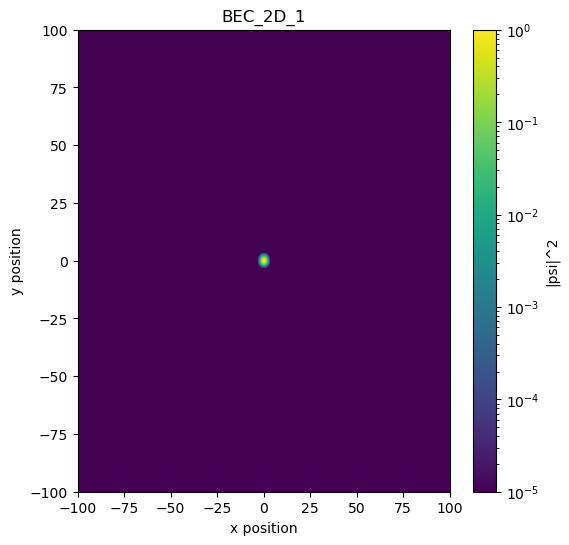

In [12]:
# plot heatmap full

path = "Runs/Data_Gaussian_moving_k5_quadratic_potential_2D_sine_potential_modulation_x_2D_sine_potential_modulation_y_2D_sine_potential_modulation_twist1_2D_sine_potential_modulation_twist2_2D_20_g_5_xy_100.0_Nsteps_20_maxdim_50_tol_1.0e-8_dt_0.01/"
ind = 1
title = "BEC_2D_"+str(ind)
plot_heatmap_2D(path, title, ind, norm="log", logmin=1e-5, logmax=1)


Runs/Data_Gaussian_moving_k5_quadratic_potential_2D_sine_potential_modulation_x_2D_sine_potential_modulation_y_2D_sine_potential_modulation_twist1_2D_sine_potential_modulation_twist2_2D_20_g_5_xy_100.0_Nsteps_20_maxdim_50_tol_1.0e-8_dt_0.01//Data_reconstructed/wf_red_2D_0.0_0.0_30.0_1.txt
p_max  1.0
p_min  3.1470183534162195e-14


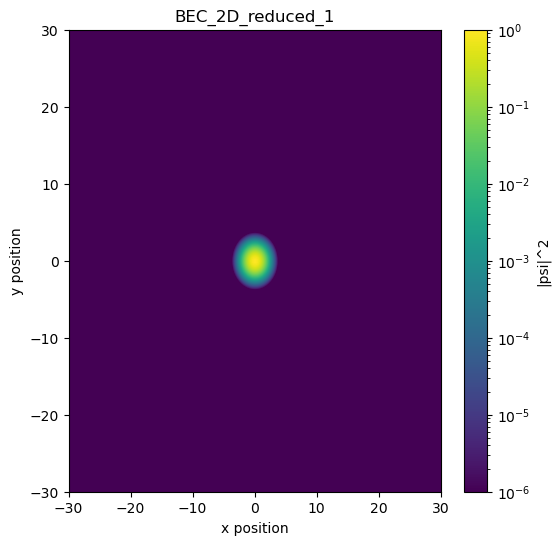

In [13]:
# plot heatmap reduced

x0 = 0.0
y0 = 0.0

xred = 30.0
yred = 30.0


path = "Runs/Data_Gaussian_moving_k5_quadratic_potential_2D_sine_potential_modulation_x_2D_sine_potential_modulation_y_2D_sine_potential_modulation_twist1_2D_sine_potential_modulation_twist2_2D_20_g_5_xy_100.0_Nsteps_20_maxdim_50_tol_1.0e-8_dt_0.01/"
ind = 1
title = "BEC_2D_reduced_"+str(ind)
plot_heatmap_reduced_2D(path, title, ind, x0, y0, xred, yred, norm="log", logmin=1e-6, logmax=1)

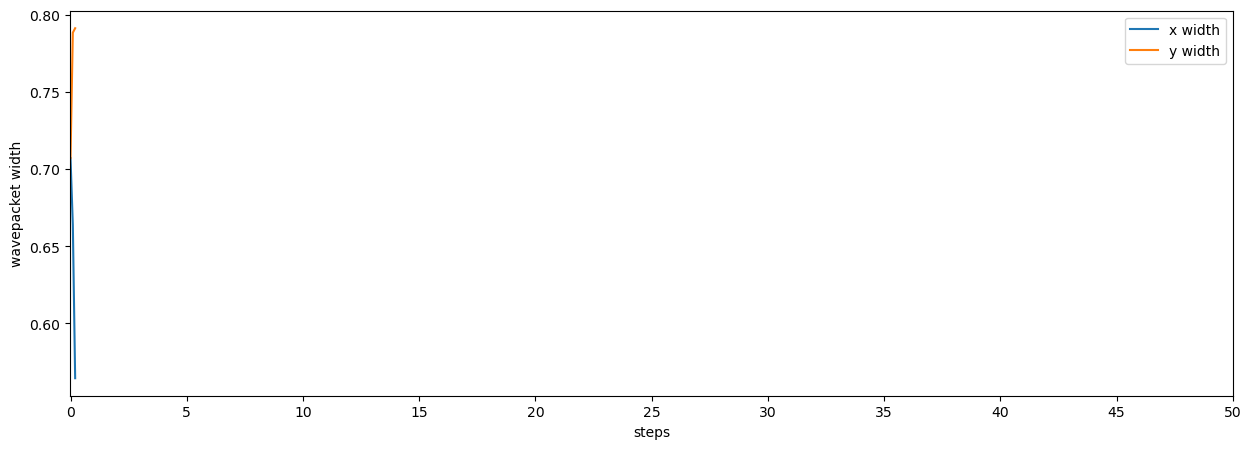

In [14]:
# plot width in x and y direction   

path = "Runs/Data_Gaussian_moving_k5_quadratic_potential_2D_sine_potential_modulation_x_2D_sine_potential_modulation_y_2D_sine_potential_modulation_twist1_2D_sine_potential_modulation_twist2_2D_20_g_5_xy_100.0_Nsteps_20_maxdim_50_tol_1.0e-8_dt_0.01/"
plot_width_2D(path)

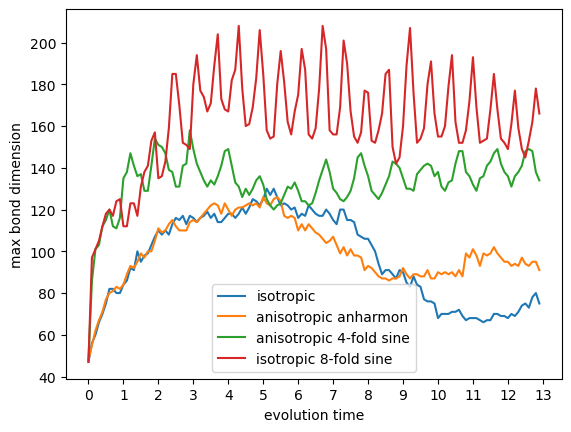

In [9]:
# some bond dimension plotting, left from previous


path1 = "Data_quadratic_potential_iso_0.01_R_20_g_5_xy_100_Nsteps_5000_maxdim_50_tol_1e-8_dt_0.01/"
path2 = "Data_quadratic_potential_aniso_anharm_0.01_0.015_0.012_R_20_g_5_xy_100_Nsteps_5000_maxdim_50_tol_1e-8_dt_0.01/"
path3 = "Data_quadratic_potential_aniso_2D_sine_potential_modulation_2D_20_g_5_xy_100.0_Nsteps_10000_maxdim_50_tol_1.0e-8_dt_0.01"
path4 = "Data_quadratic_potential_2D_sine_potential_modulation_x_2D_sine_potential_modulation_y_2D_sine_potential_modulation_twist1_2D_sine_potential_modulation_twist2_2D_20_g_5_xy_100.0_Nsteps_10000_maxdim_50_tol_1.0e-8_dt_0.01"

paths = [path1, path2, path3, path4]
labels = ["isotropic", "anisotropic anharmon", "anisotropic 4-fold sine", "isotropic 8-fold sine"]

for i in range(len(paths)):
    filename = paths[i]+"/Data_reconstructed/bond_dims.txt"
    if os.path.exists(filename): 
        arr = np.loadtxt(filename)
        plt.plot(range(len(arr)), arr, label=labels[i])
        plt.legend()
        plt.ylabel("max bond dimension")
        plt.xlabel("evolution time")
        new_xticks = np.linspace(0, 130, num=14)  # Choose 11 ticks for clarity
        new_xticklabels = np.linspace(0, 13, num=14)  # Map to [0, 100]
        plt.xticks(new_xticks, [f"{int(y)}" for y in new_xticklabels])
        plt.savefig("bond_dimensions_comparison_2D.png", dpi=300)
    else:
        print("File not found!")
plt.show()